In [7]:
# Load 
import warnings
warnings.filterwarnings('ignore')

import sys, os
import matplotlib
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr 
import time
import datetime
import cmaps 
import dill #save session 
import matplotlib.pylab as pl
import folium
from cnmaps import get_adm_maps
import geopandas as gpd
import cartopy
import salem
#Map functions
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
import matplotlib.colors as colors
import matplotlib as mpl
import cartopy.feature as cfeature  
from cartopy.util import add_cyclic_point
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator

In [8]:
linewidth = 0.5
linewidth2 = 1
fontsize = 9
start_year = 2015
end_year = 2100
labelcolor = '#6b6b6b'
lc1 = '#6e1913'
lc2 = '#a42018'
lc3 = '#f62d18'
lc4 = '#d97c26'
lc5 = '#ff912b'
lc6 = '#30b5d6'
lc7 = '#28ac92'
lc8 = '#123264'
lc9 = '#05101f'
minor_locator = MultipleLocator(10)
specific_years = [2015, 2050, 2100]
alpha=0.075

In [2]:
file_path = '/Users/user/Desktop/CESM_data/inputdata/'
fname = file_path + 'surfdata_0.9x1.25_hist_78pfts_CMIP6_simyr1850_c190214.nc'
ds = xr.open_dataset(fname)
lat  = ds['LATIXY'].values
lon  = ds['LONGXY'].values
PFTDATA_MASK = ds['PFTDATA_MASK']
PCT_URBAN = ds['PCT_URBAN'].values

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

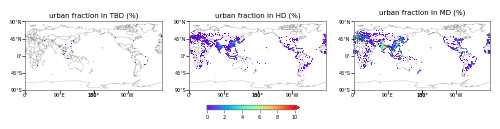

In [16]:
fig = plt.figure()
proj=ccrs.PlateCarree()
boundarywidth = 0.5
proj = ccrs.PlateCarree()
cmap = plt.cm.get_cmap('rainbow')
fig, axs = plt.subplots(1, 3, figsize=(6, 2), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
title = ['urban fraction in TBD (%)', 'urban fraction in HD (%)', 'urban fraction in MD (%)']

for i, ax in enumerate(axs.flatten()):
    extent = [-180,180,-90,90]
    ax.set_extent(extent, crs=proj)
    ax.add_feature(cfeature.BORDERS,lw=0.1)
    mask = PCT_URBAN > 0
    PCT_URBAN_filt = np.ma.masked_array(PCT_URBAN, mask=~mask)
    ax.coastlines(resolution='110m',linestyle='dashed',linewidth=0.2,zorder=2,color=labelcolor,alpha=1)
    
    cs = ax.pcolormesh(lon-180,lat, PCT_URBAN_filt[i,:,:] ,cmap=cmap, vmin=0, vmax=10)
    
    ax.set_title(title[i],fontsize=5,pad=3.5)
    ax.set_xticks(np.arange(extent[0], extent[1] +1, 90), crs = proj)
    ax.tick_params(axis='both', labelsize=3.5, length=2, pad =0.03, width = boundarywidth)
    ax.set_yticks(np.arange(extent[-2], extent[-1] + 1, 45), crs = proj)
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.title(title[i], fontsize=5, pad=5)
    for spine in ax.spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)

cbar = plt.colorbar(cs,ax=axs, shrink=0.63,orientation='horizontal',location='bottom',pad=0.1, extend='max', fraction=0.03)
cbar.ax.tick_params(length=2, labelsize=3.5, pad = 1, width=boundarywidth, color=labelcolor)
cbar.outline.set_linewidth(boundarywidth)
cbar.outline.set_edgecolor(labelcolor)
plt.savefig('UrbanFraction.png',dpi=300) 
plt.show

[[  0.     1.25   2.5  ... 356.25 357.5  358.75]
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]
 ...
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]]
[[  0.     1.25   2.5  ... 356.25 357.5  358.75]
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]
 ...
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]]
[[  0.     1.25   2.5  ... 356.25 357.5  358.75]
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]
 ...
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]
 [  0.     1.25   2.5  ... 356.25 357.5  358.75]]


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

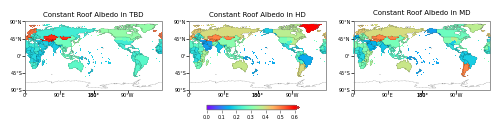

In [30]:
fig = plt.figure()
proj=ccrs.PlateCarree()
boundarywidth = 0.5
proj = ccrs.PlateCarree()
cmap = plt.cm.get_cmap('rainbow')
fig, axs = plt.subplots(1, 3, figsize=(6, 2), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
title = ['Constant Roof Albedo in TBD', 'Constant Roof Albedo in HD', 'Constant Roof Albedo in MD']
roof_albedo = ds['ALB_ROOF_DIR'][0,:,:,:]

for i, ax in enumerate(axs.flatten()):
    extent = [-180,180,-90,90]
    ax.set_extent(extent, crs=proj)
    ax.add_feature(cfeature.BORDERS,lw=0.1)
    mask = roof_albedo[i,:,:] > 0
    ax.coastlines(resolution='110m',linestyle='dashed',linewidth=0.2,zorder=2,color=labelcolor,alpha=1)
    roof_albedo_filt = np.ma.masked_array(roof_albedo[i,:,:], mask=~mask)
    cs = ax.pcolormesh(lon-180, lat , roof_albedo_filt ,cmap=cmap, vmin=0, vmax=0.6)
    #print(lon)
    ax.set_title(title[i],fontsize=5,pad=3.5)
    #ax.set_xticks(np.arange(extent[0], extent[1] +1, 90), crs = proj)
    ax.set_xticks(np.arange(-180, 181, 90), crs=proj)
    #ax.set_xticklabels(['0°', '90°E', '180°', '90°W', '0°'], fontsize=3.5)
    ax.tick_params(axis='both', labelsize=3.5, length=2, pad =0.03, width = boundarywidth)
    ax.set_yticks(np.arange(extent[-2], extent[-1] + 1, 45), crs = proj)
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.title(title[i], fontsize=5, pad=5)
    for spine in ax.spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)

cbar = plt.colorbar(cs,ax=axs, shrink=0.63,orientation='horizontal',location='bottom',pad=0.1, extend='max', fraction=0.03)
cbar.ax.tick_params(length=2, labelsize=3.5, pad = 1, width=boundarywidth, color=labelcolor)
cbar.outline.set_linewidth(boundarywidth)
cbar.outline.set_edgecolor(labelcolor)
plt.savefig('ConstanRoofAlbedo.png',dpi=300) 
plt.show

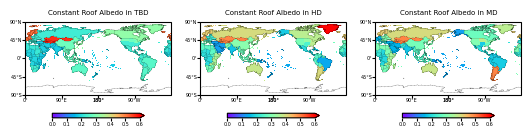

In [20]:
# urban albedo
fig2 = plt.figure()
proj=ccrs.PlateCarree()
roof_albedo = ds['ALB_ROOF_DIR'][0,:,:,:]
# choose color: https://matplotlib.org/stable/users/explain/colors/colormaps.html
for i in range(0,3):
    extent = [-180,180,-90,90]
    proj=ccrs.PlateCarree()
    title = ['Constant Roof Albedo in TBD', 'Constant Roof Albedo in HD', 'Constant Roof Albedo in MD']
    ax2 = fig2.add_subplot(1,3,i+1, projection=ccrs.PlateCarree(central_longitude=180),facecolor='white')
    ax2.set_extent(extent, crs=proj)
    cmap = plt.cm.get_cmap('rainbow')
    mask = roof_albedo[i,:,:]>0
    # Filter the data array using the mask 
    roof_albedo_filt = np.ma.masked_array(roof_albedo[i,:,:], mask=~mask)
    ax2.add_feature(cfeature.BORDERS,lw=0.1)
    ax2.coastlines(resolution='110m',linestyle='dashed',linewidth=0.2,zorder=2,color='k',alpha=1)
    cs2 = ax2.pcolormesh(lon-180,lat, roof_albedo_filt ,cmap=cmap, vmin=0, vmax=0.6)
    ax2.set_xticks(np.arange(extent[0], extent[1] +1, 90), crs = proj)
    ax2.tick_params(axis='both', labelsize=3.5, length=2, pad =0.03)
    ax2.set_yticks(np.arange(extent[-2], extent[-1] + 1, 45), crs = proj)
    ax2.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax2.yaxis.set_major_formatter(LatitudeFormatter())
    plt.title(title[i],fontsize=5,pad=5)
    cbar2=plt.colorbar(cs2,shrink=0.63,orientation='horizontal',pad=0.05, extend='max')
    cbar2.ax.tick_params(length=2,labelsize=3.5, pad = 1)
    plt.savefig('ConstanRoofAlbedo.TIF',dpi=800,bbox_inches='tight',pad_inches=0.1) 